<font size = 6>
<font color='blue'>
<center>
    Tarea de programación 2

# Hoja de Programación 1: Teoría de Decisión de Bayes (40 P)

En esta hoja de ejercicios, aplicaremos la teoría de decisión de Bayes en el contexto de pequeños problemas bidimensionales. Para ello, haremos uso del trazado 3D (3D plotting). A continuación, presentamos los conceptos básicos para construir estos gráficos en Python/Matplotlib.

### La función `numpy.meshgrid`

Para trazar funciones bidimensionales, primero debemos discretizar el espacio de entrada bidimensional. Una función básica para este propósito es `numpy.meshgrid`. El siguiente código crea una cuadrícula discreta de la superficie rectangular $[0,4] \times [0,3]$. La función `numpy.meshgrid` toma los intervalos discretizados como entrada y devuelve dos matrices de tamaño correspondientes a la superficie discretizada (es decir, la cuadrícula) y que contienen las coordenadas X e Y respectivamente.

In [1]:
import numpy as np
X,Y = np.meshgrid([0,1,2,3,4],[0,1,2,3])
print(X)
print(Y)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


Tenga en cuenta que podemos iterar sobre los elementos de la cuadrícula comprimiendo las dos matrices `X` e `Y` que contienen cada coordenada. La función `numpy.flatten` convierte las matrices 2D en matrices unidimensionales, que luego se pueden iterar por elementos. 

In [2]:
print(list(zip(X.flatten(),Y.flatten())))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3)]


### 3D-Plotting

Para habilitar el graficado en 3D, primero debemos cargar algunos módulos además de `matplotlib`:

In [3]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Como ejemplo, nos gustaría trazar la función de norma L2 $f(x,y) = \sqrt{x^2 + y^2}$ en el subespacio $x,y \in [-4,4]$ . Primero, creamos una malla con el tamaño apropiado:

In [4]:
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)
print(X.shape,Y.shape)

(81, 81) (81, 81)


Aquí, hemos utilizado una discretización con pequeños incrementos de 0,1 para producir un gráfico con mejor resolución. La malla resultante tiene un tamaño (81x81), es decir, aproximadamente 6400 puntos. La función $f$ necesita ser evaluada en cada uno de estos puntos. Esto se logra mediante la aplicación de operaciones por elementos en las matrices de la malla. Por lo tanto, la norma en cada punto de la cuadrícula se calcula como:

In [5]:
F = (X**2+Y**2)**.5
print(F.shape)

(81, 81)


Los valores de la función resultante son del mismo tamaño que la malla. Tomar 'X', 'Y', 'F' en conjunto da como resultado una lista de aproximadamente 6400 conjuntos de tres puntos que representan las coordenadas x, y y z en el espacio tridimensional donde se debe trazar la función. El gráfico 3D ahora se puede construir fácilmente mediante la función `scatter` de `matplotlib.pyplot`.

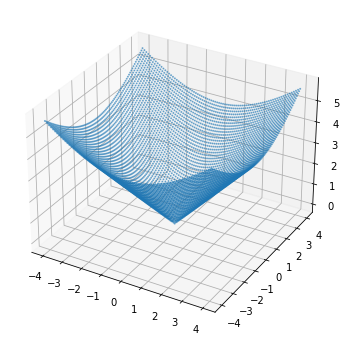

In [6]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,F,s=1,alpha=0.5)

Los parámetros `s` y `alpha` controlan el tamaño y la transparencia de cada punto de datos. Existen otras variantes de gráficos en 3D (por ejemplo, gráficos de superficie), sin embargo, el gráfico de dispersión es el enfoque más simple, al menos conceptualmente. Habiendo presentado cómo trazar fácilmente funciones 3D en Python, ahora podemos analizar distribuciones de probabilidad bidimensionales con esta misma herramienta.

## Ejercicio 1: Distribuciones gaussianas (5+5+5 P)

Usando la técnica presentada anteriormente, nos gustaría trazar una distribución de probabilidad gaussiana normal con un vector promedio $\mu = (0,0)$ y una matriz de covarianza $\Sigma = I$, también conocida como distribución normal estándar. Consideramos la misma discretización que arriba (es decir, una cuadrícula de -4 a 4 usando un tamaño de paso 0.1). Para espacios de entrada bidimensionales, la distribución normal estándar viene dada por:
$$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$$
Esta distribución suma $1$ cuando se integra sobre $\mathbb{R}^2$. Sin embargo, no suma $1$ cuando se suma sobre el espacio discretizado (es decir, la cuadrícula). En su lugar, podemos trabajar con una distribución tipo Gaussiana discretizada:
$$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{con} \quad Z = \sum_{x,y} e^{-0.5 (x^ 2+y^2)}
$$
donde la suma recorre todo el espacio discretizado.

* **Calcule la distribución $P(x,y)$ y grafíquela.**

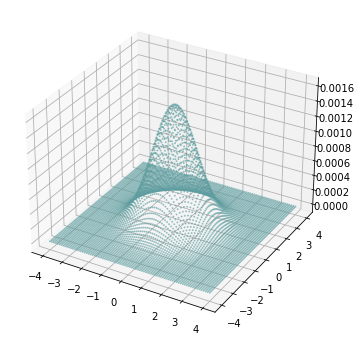

In [7]:
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)

Z=np.sum(np.exp(-0.5*(X**2+Y**2)))#Definimos Z

Pxy=(1/Z)*(np.exp(-0.5*(X**2+Y**2)))#Funcion de probabilidad
#Grafigamos
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Pxy,s=1,color = "cadetblue",alpha=0.5)

* **Calcule la distribución condicional $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, y grafíquela.**


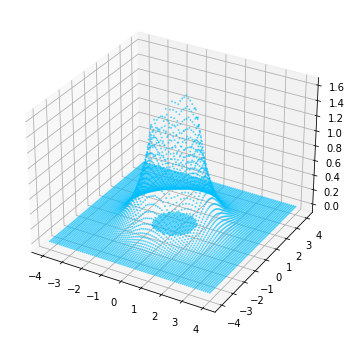

In [8]:
#gaussiana discretizada
P1=Pxy

#Variable para la Probabilidad condicional
P2=X**2+Y**2

for i in list(range(len(P2))):
    for j in list(range(len(P2))):
        if (P2[i,j]>=1):
            P2[i,j]=1
        else:
            P2[i,j]=0
#Normalizamos
Z2=np.sum(P2)
P2=(1/Z2)*(P2)
#Probabilidad marginal de y, probabilidad individual. 
P2y=np.sum(P2, axis=0)

#Finalmente la distribucion condicional.
Qxy=P1*P2/P2y

#Graficamos
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Qxy,color = "deepskyblue",s=1,alpha=0.5)

* **Margenizar la distribución condicionada $Q(x,y)$ sobre $y$ y trazar la distribución resultante $Q(x)$.**

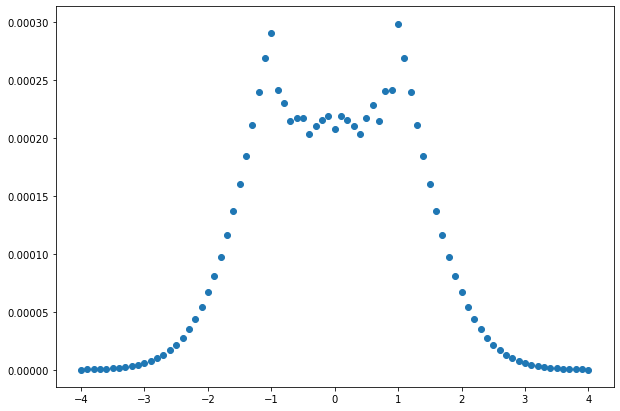

In [9]:
fig = plt.figure(figsize=(10,7))
plt.scatter(X[0],np.sum(Qxy, axis=0))

## Ejercicio 2: Clasificación Bayesiana (5+5+5 P)

Deje que las dos coordenadas x e y se representen ahora como un vector bidimensional $\boldsymbol{x}$. Consideremos dos clases $\omega_1$ y $\omega_2$ con distribuciones gaussianas generadoras de datos $p(\boldsymbol{x}|\omega_1)$ y $p(\boldsymbol{x}|\omega_2)$ de vectores medios
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{y} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$
respectivamente, y la misma matriz de covarianza
$$\Sigma = \begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$
Las clases ocurren con probabilidad $P(\omega_1) = 0.9$ y $P(\omega_2) = 0.1$. El análisis nos dice que en tal escenario, el límite de decisión óptimo entre las dos clases debería ser lineal. Nos gustaría verificar esto computacionalmente aplicando la teoría de decisión de Bayes en distribuciones discretizadas en forma de cuadrícula.

* **Utilizando la misma cuadrícula que en el Ejercicio 1, discretice las dos distribuciones generadoras de datos $p(\boldsymbol{x}|\omega_1)$ y $p(\boldsymbol{x}|\omega_2)$ (es decir, cree distribuciones discretas distribuciones $P(\boldsymbol{x}|\omega_1)$ y $P(\boldsymbol{x}|\omega_2)$ en la cuadrícula), y grafíquelas con diferentes colores.**


Se sabe que:

$$P(\mathbf{x}|ω_j)=\frac{1}{\sqrt{(2\pi)^ddet(\mathbf{Σ_j})}}exp\left(-0.5(\mathbf{x}-\mathbf{\mu_j})^T\mathbf{(\Sigma}_j^{-1})(\mathbf{x}-\mathbf{\mu_j})\right)$$


Para R2 se tiene entonces que:

$$P(\mathbf{x}|ω_j)=\frac{1}{\sqrt{(2\pi)^ddet(\mathbf{Σ_j})}}exp\left(-0.5\left[(x-\mu_1)^2+2(y-\mu_2)^2\right]\right)$$

y Por ultimo sacando los valores del determinante y de "d" finalmente se tiene: 

$$P(\mathbf{x}|ω_j)=\frac{1}{\sqrt{(2\pi)^2(0.5)}}exp\left(-0.5\left[(x-\mu_1)^2+2(y-\mu_2)^2\right]\right)$$

Simplificando se tiene:

$$P(\mathbf{x}|ω_j)=\frac{1}{\sqrt{2(\pi)^2}}exp\left(-0.5\left[(x-\mu_1)^2+2(y-\mu_2)^2\right]\right)$$

Entonces asi podemos sacar las dos clases como sigue:

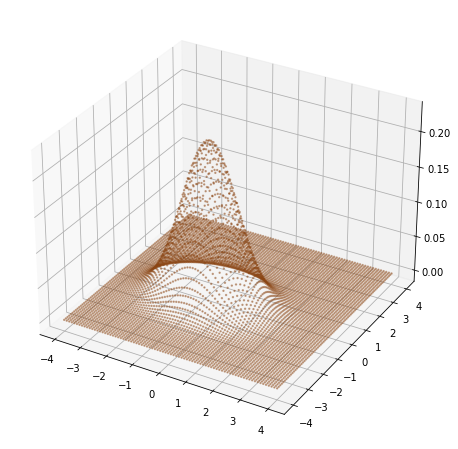

In [10]:
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)

Pxy1=(1/np.sqrt((2*(np.pi)**2)))*np.exp((-0.5*((X+0.5)**2+2*(Y+0.5)**2)))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Pxy1,s=2,alpha=0.4, color='saddlebrown')

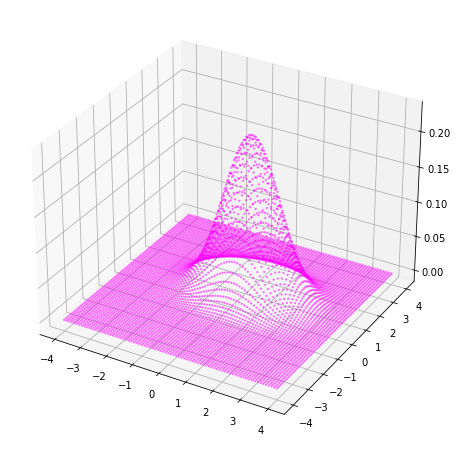

In [11]:
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)

Pxy2=(1/np.sqrt((2*(np.pi)**2)))*np.exp((-0.5*((X-0.5)**2+2*(Y-0.5)**2))) 

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Pxy2,s=2,alpha=0.4, color='fuchsia')

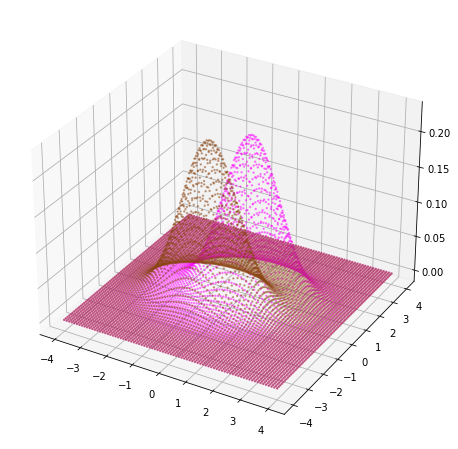

In [12]:
#Ahora graficamos la primer clase junto a la segunda
R=np.arange(-4,4+1e-9,0.1)
X,Y=np.meshgrid(R,R)

Pxy1=(1/np.sqrt((2*(np.pi)**2)))*np.exp((-0.5*((X+0.5)**2+2*(Y+0.5)**2))) 
Pxy2=(1/np.sqrt((2*(np.pi)**2)))*np.exp((-0.5*((X-0.5)**2+2*(Y-0.5)**2))) 

fig=plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,Pxy1,s=2,alpha=0.4, color='saddlebrown')
ax.scatter(X,Y,Pxy2,s=2,alpha=0.4, color='fuchsia')

* **A partir de estas distribuciones, calcule la distribución de probabilidad total $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c) \cdot P (\omega_c)$ y grafíquelo.**


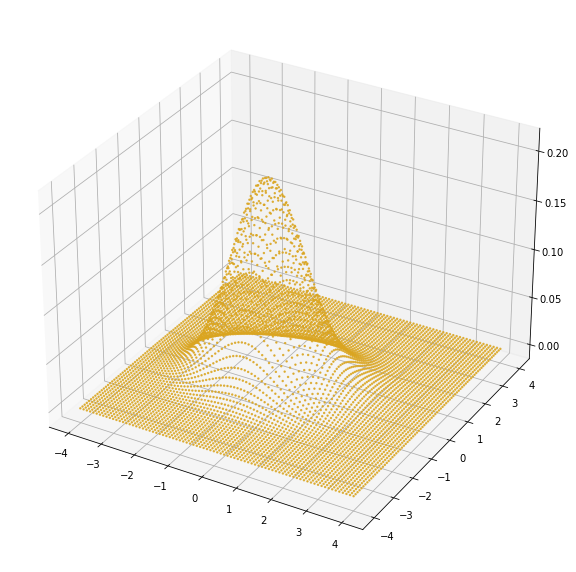

In [13]:
#Probabilidad total
Pt=Pxy1*0.9+Pxy2*0.1
fig=plt.figure(figsize=(10,12))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,Pt,s=2,alpha=0.8, color='goldenrod')

* **Calcule y grafique las probabilidades posteriores de clase $P(\omega_1|\boldsymbol{x})$ y $P(\omega_2|\boldsymbol{x})$, e imprima la tasa de error de Bayes para el caso discretizado.**

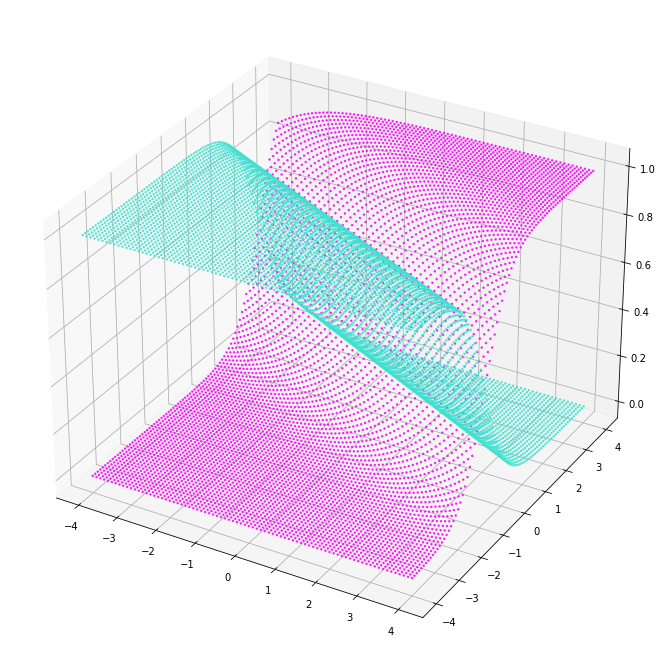

In [14]:
Proba1=(Pxy1*0.9)/Pt
Proba2=(Pxy2*0.1)/Pt
fig=plt.figure(figsize=(15,12))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,Proba1,s=2,alpha=0.8, color='turquoise')
ax.scatter(X,Y,Proba2,s=2,alpha=0.8, color='fuchsia')

In [15]:
con1=Proba1>Proba2
con2=Proba1<Proba2
Proba1[con1]=0
Proba2[con2]=0
min=Proba1+Proba2
np.sum(min*Pt*0.01)

0.08040553760622282

Error del 8.04%

## Ejercicio 3: Reducción de la Varianza (5+5 P)

Suponga que la distribución de generación de datos para la segunda clase cambia para producir muestras mucho más cercanas a la media. Esta reducción de varianza para la segunda clase se implementa manteniendo la primera covarianza igual (es decir, $\Sigma_1 = \Sigma$) y dividiendo la segunda matriz de covarianza por 4 (es decir, $\Sigma_2 = \Sigma/4$). Para este nuevo conjunto de parámetros, podemos realizar el mismo análisis que en el Ejercicio 2.

* **Represente las probabilidades posteriores de la nueva clase $P(\omega_1|\boldsymbol{x})$ y $P(\omega_2|\boldsymbol{x})$ asociadas a las nuevas matrices de covarianza e imprima la nueva tasa de error de Bayes .**

Ahora tenemos que la primera covarianza no varia, pero la segunda si, esto es:
$$\Sigma2 = \begin{pmatrix}1.0/4.0&0\\0&0.5/4.0\end{pmatrix}.$$

Podemos calcular las variables de $$P(\mathbf{x}|ω_j)=\frac{1}{\sqrt{(2\pi)^ddet(\mathbf{Σ2_j})}}exp\left(-0.5\left[(x-\mu_1)^2+\mathbf{(\Sigma}2_j^{-1})(y-\mu_2)^2\right]\right)$$


Notemos que:
$$\Sigma_2^{-1} = \begin{pmatrix}
4.0 & 0\\
0&8.0
\end{pmatrix} = 4\Sigma^{-1} $$
entonces 
$$P(x|ω_2)= {\frac{1}{\sqrt{4\pi^2 (1/8)}}}   \exp \left(-0.5 [(x - 0.5)^2 \quad 4\Sigma^{-1}(y - 0.5)] \right)$$
$$P(x|ω_2)= {\frac{1}{\sqrt{\pi^2 (0.5)}}}   exp\left(-2\left[(x-\mu_1)^2+\mathbf{(\Sigma}_j^{-1})(y-\mu_2)^2\right]\right)$$

In [16]:
sigma = np.array([[0.25,0], [0,0.125]])
sigmainv = np.linalg.inv(sigma)
print(sigmainv)

[[4. 0.]
 [0. 8.]]


Asi sabemos la matriz invertida y podemos procegir como sigue:

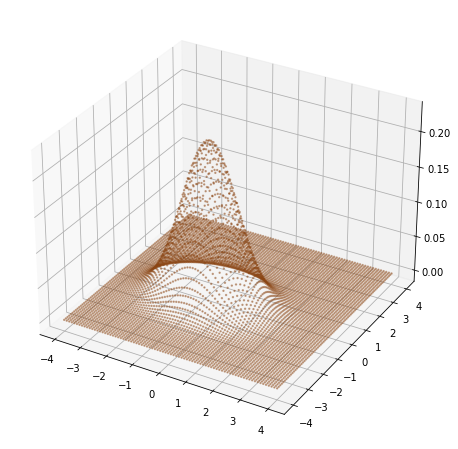

In [17]:
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)

Pxy1_1=(1/np.sqrt((2*(np.pi)**2)))*np.exp((-0.5*((X+0.5)**2+2*(Y+0.5)**2))) 

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Pxy1_1,s=2,alpha=0.4, color='saddlebrown')

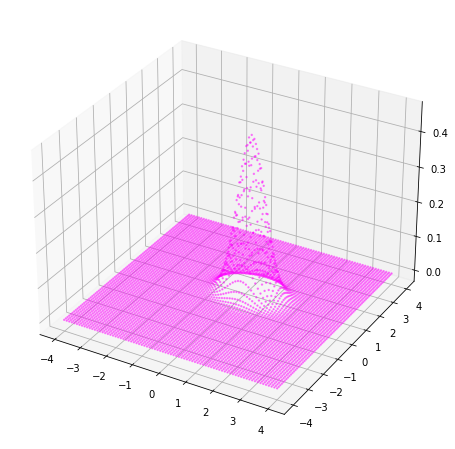

In [18]:
R = np.arange(-4,4+1e-9,0.1)
X,Y = np.meshgrid(R,R)

Pxy2_1=(1/np.sqrt(((np.pi)**2)*(0.5)))*np.exp(-(2)*( (X-0.5)**2 + (2)*(Y-0.5)**2))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Pxy2_1,s=2,alpha=0.4, color='fuchsia')

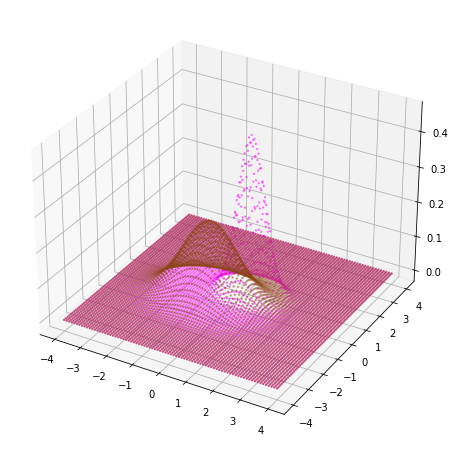

In [19]:
R=np.arange(-4,4+1e-9,0.1)
X,Y=np.meshgrid(R,R)

Pxy1_1=(1/np.sqrt((2*(np.pi)**2)))*np.exp((-0.5*((X+0.5)**2+2*(Y+0.5)**2)))
Pxy2_1=(1/np.sqrt(((np.pi)**2)*(0.5)))*np.exp(-(2)*( (X-0.5)**2 + (2)*(Y-0.5)**2))

fig=plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,Pxy1_1,s=2,alpha=0.4, color='saddlebrown')
ax.scatter(X,Y,Pxy2_1,s=2,alpha=0.4, color='fuchsia')

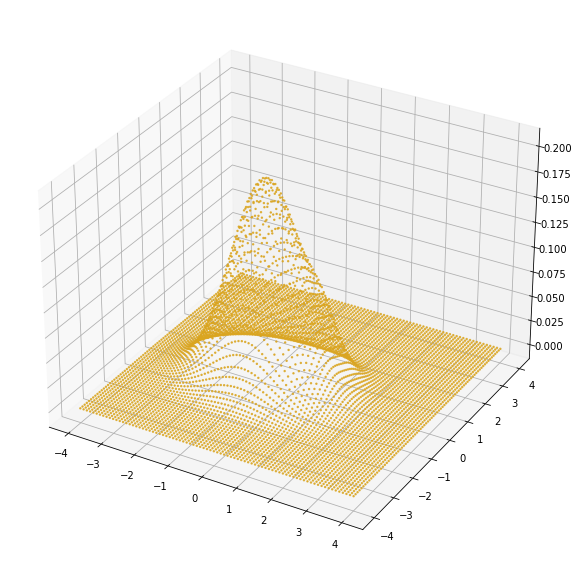

In [20]:
#Probabilidad total
Pt2=Pxy1_1*0.9+Pxy2_1*0.1
fig=plt.figure(figsize=(10,12))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,Pt2,s=2,alpha=0.8, color='goldenrod')

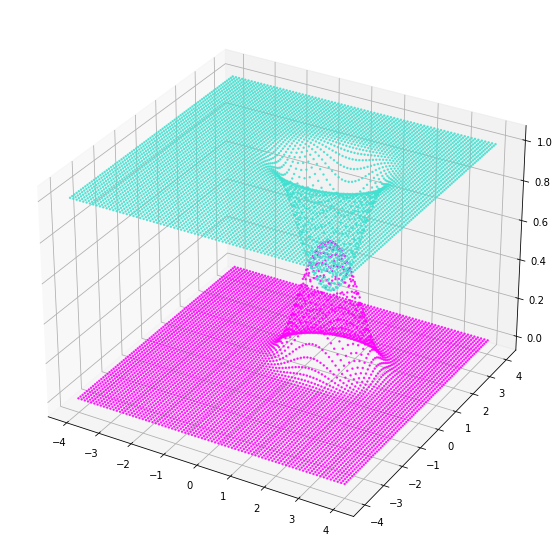

In [21]:
Proba1_1=(Pxy1_1*0.9)/Pt2
Proba2_1=(Pxy2_1*0.1)/Pt2
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection='3d')
ax.scatter(X,Y,Proba1_1,s=2,alpha=0.8, color='turquoise')
ax.scatter(X,Y,Proba2_1,s=2,alpha=0.8, color='fuchsia')

In [22]:
con1_1=Proba1_1>Proba2_1
con2_1=Proba1_1<Proba2_1
Proba1_1[con1_1]=0
Proba2_1[con2_1]=0
min=Proba1_1+Proba2_1
np.sum(min*Pt2*0.01)

0.04668604903162435

Error del 4.67% 

La intuición nos dice que mediante la reducción de la varianza y la concentración resultante de los datos generados para la clase 2 en una región más pequeña del espacio de entrada, debería ser más fácil predecir la clase 2 con certeza en esta ubicación. Paradójicamente, en este nuevo escenario "denso", observamos que la clase 2 no alcanza la certeza total en ningún lugar del espacio de entrada, mientras que sí lo hizo en el ejercicio anterior.

* **Explique esta paradoja.**

Recortemos que la varianza es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media, al hacer una reducción de la varianza se genera un espacio más denso(osea muchos mas valores estan dentro de este espacio a comparacion de lo que teniamos en el ejercicio 2). Por ende, podemos decir que los datos del ejercicio 2 estan mas dispersos comparados a los del 3 pero el dos tiene un espacio de certeza, esto puede deberse a que se sabe donde estan los puntos respecto al espacio, cosa que no pasa en el ejercicio 3 por lo visto

<font size = 6>
<font color='red'>
Problemas de puntos extra 

Se pueden emplear para esta tarea o aquellas donde hayan salido más bajos.

# Problema 1 (0.5 puntos)

En países como Estados Unidos y Canadá los números telefónicos se conforman de 10 dígitos, normalmente separados en tres dígitos para el código de área, tres dígitos para el código de intercambio y cuatro dígitos para el código de estación. También pueden o no contener al inicio los dígitos +1 como código de país. En la práctica se tienen varias formas de representarlos:

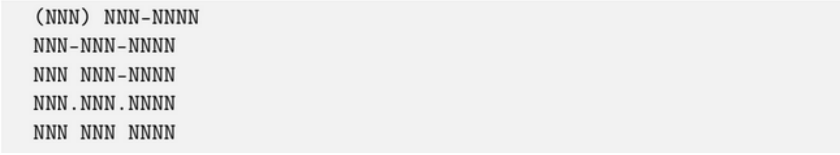

In [7]:
from IPython.display import Image
Image("1.png")

Escribe una función que reconozca todas las representaciones anteriores de un número telefónico. La función recibe el número telefónico y debe regresar True si el número es valido y False si el número no es valido. Algunos ejemplos de números telefónicos validos son:

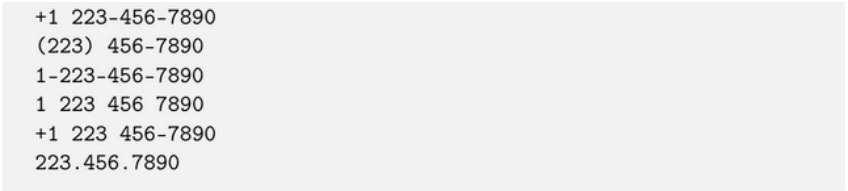

In [8]:
Image("2.png")

# Problema 2 (0.1 puntos)

Regresa una lista con todos los nombres del siguiente string

In [65]:
s = "Juan decidió tomar el curso, convenció a su amigo Luis de inscribirlo"

In [66]:
import re
div = re.split(' ',s)

In [67]:
nombres=[]
for i in div:
  if re.match("^[A-Z]",i):
    nombres.append(i)
print(nombres)

['Juan', 'Luis']


# Problema 3 (1 punto)

Considere el archivo data.txt. Este archivo registra el acceso que hace un usuario al visitar una página web. Cada línea del registro tiene los siguientes elementos:

     un anfitrión (por ejemplo, '146.204.224.152')
     un nombre de usuario (por ejemplo, 'feest6811' A veces falta el nombre de usuario. En este se usa '-' como valor para el nombre de usuario).
     la hora en que se realizó una solicitud (por ejemplo, '21/jun/2019:15:45:24 -0700')
     el tipo de solicitud de publicación (por ejemplo, 'POST /incentivize HTTP/1.1')

Convierta esto a una lista de diccionarios:

    ejemplo_dict = {"host":"146.204.224.152",

                 "nombre_de_usuario":"feest6811",
                 
                 "hora":"21/jun/2019:15:45:24 -0700",
                 
                 "solicitud":"POST /incentivar HTTP/1.1"}

# Problema 4 (0.1 puntos)

Sustituye las apariciones de la cadena "the the" por la cadena "the" del siguiente string:

s = "If the the problem is textual use the the re module"